## Enunciado

>Considere el proyecto cuya información se adjunta.
> 1. Dibuje el grafo PERT y determine el camino crítico.
> 2. Indique sus actuaciones si existiera un límite de disponibilidad de recursos durante los primeros 7 periodos igual a 3 unidades.
> 3. Indique sus actuaciones para reducir la duración del proyecto hasta 28 periodos con un mínimo sobrecoste añadido.
> 4. Indique sus actuaciones para reducir la duración del proyecto hasta su duración tope con un mínimo sobrecoste añadido.
> 5. Duración del proyecto si se introducen los siguientes cambios:
>      - Entre el final de la actividad H y el comienzo de la L deben transcurrir 2 periodos.
>      - La tarea K se inicia cuando F está a mitad de su ejecución


In [1]:
# Alargamos el ancho de las celdas al 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, duracion_tope, cur, recursos
     ('A',       '---  ',     4,         1,          25,     2    ),
     ('B',       'A    ',     4,         1,          25,     1    ),  
     ('C',       'A    ',     5,         2,          20,     2    ),
     ('D',       'A    ',     4,         1,          10,     2    ),
     ('E',       'A    ',     3,         2,          50,     2    ), 
     ('F',       'D,E  ',     6,         3,          30,     4    ),
     ('G',       'F    ',     4,         1,          25,     1    ),
     ('H',       'B,C,G',     7,         4,          20,     1    ),
     ('I',       'C,G  ',     5,         2,          20,     3    ),
     ('J',       'I    ',     4,         1,          25,     4    ),
     ('K',       'F    ',     4,         1,          25,     1    ),
     ('L',       'H    ',     8,         5,          10,     2    ),
     ('M',       'I,K  ',     4,         1,          25,     1    ),
    
] ,columns=['actividad', 'precedentes', 'duracion', 'duracion_tope', 'cur', 'recursos']).set_index('actividad')

datos_enunciado

,precedentes,duracion,duracion_tope,cur,recursos
actividad,,,,,
A,---,4,1,25,2
B,A,4,1,25,1
C,A,5,2,20,2
D,A,4,1,10,2
E,A,3,2,50,2
F,"D,E",6,3,30,4
G,F,4,1,25,1
H,"B,C,G",7,4,20,1
I,"C,G",5,2,20,3


## Solución
### Apartado 1

> Dibuje el grafo PERT y determine el camino crítico.

En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

In [2]:
from pmule import calcula_encadenamientos, GrafoProyecto

In [3]:
calcula_encadenamientos(datos_enunciado.precedentes)

actividad,A,B,C,D,E,F,G,H,I,J,K,L,M
actividad,,,,,,,,,,,,,
A,,,,,,,,,,,,,
B,True,,,,,,,,,,,,
C,True,,,,,,,,,,,,
D,True,,,,,,,,,,,,
E,True,,,,,,,,,,,,
F,,,,True,True,,,,,,,,
G,,,,,,True,,,,,,,
H,,True,True,,,,True,,,,,,
I,,,True,,,,True,,,,,,


La clase PertGraph permite visualizar el grafo PERT, el diagrama de Gantt así como realizar el cálculo de tiempos tempranos, tardíos y de las holguras totales.

In [4]:
aristas = pd.DataFrame([
# actividad, nodo_inicial, nodo_final
  (  'A',  1,   2  ),
  (  'B',  2,   7  ),
  (  'C',  2,   6  ),
  (  'D',  2,   4  ),
  (  'E',  2,   3  ),
  (  'F',  4,   5  ),
  (  'G',  5,   6  ),
  (  'H',  7,   8  ),
  (  'I',  6,   9  ),
  (  'J',  9,  11  ),
  (  'K',  5,  10  ),
  (  'L',  8,  11  ),
  (  'M', 10,  11  ),
  ( 'f1',  3,   4  ),
  ( 'f2',  6,   7  ),   
  ( 'f3',  9,  10  ),  
] ,columns=['actividad', 'nodo_inicial', 'nodo_final']).set_index('actividad')

datos_proyecto = pd.concat([datos_enunciado, aristas], axis=1, sort=False).set_index(aristas.index).fillna(0)
datos_proyecto

,precedentes,duracion,duracion_tope,cur,recursos,nodo_inicial,nodo_final
actividad,,,,,,,
A,---,4.0,1.0,25.0,2.0,1,2
B,A,4.0,1.0,25.0,1.0,2,7
C,A,5.0,2.0,20.0,2.0,2,6
D,A,4.0,1.0,10.0,2.0,2,4
E,A,3.0,2.0,50.0,2.0,2,3
F,"D,E",6.0,3.0,30.0,4.0,4,5
G,F,4.0,1.0,25.0,1.0,5,6
H,"B,C,G",7.0,4.0,20.0,1.0,7,8
I,"C,G",5.0,2.0,20.0,3.0,6,9


In [5]:
proyecto = GrafoProyecto(datos_proyecto)

##### Grafo PERT con numeración de nodos

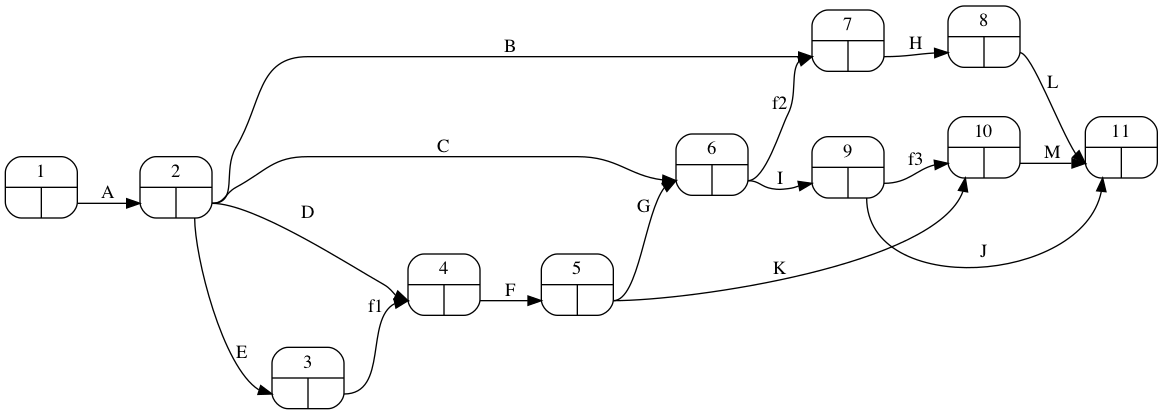

In [6]:
proyecto.pert(duraciones=False)

##### Matriz de Zaderenko 

In [7]:
proyecto.resolver_zaderenko()

,1,2,3,4,5,6,7,8,9,10,11,temprano
1,,4,,,,,,,,,,0
2,,,3,4,,5,4,,,,,4
3,,,,0,,,,,,,,7
4,,,,,6,,,,,,,8
5,,,,,,4,,,,4,,14
6,,,,,,,0,,5,,,18
7,,,,,,,,7,,,,18
8,,,,,,,,,,,8,25
9,,,,,,,,,,0,4,23
10,,,,,,,,,,,4,23


In [8]:
resultados_pert = proyecto.calcula_pert()
resultados_pert['nodos']

,tempranos,tardios
1,0.0,0.0
2,4.0,4.0
3,7.0,8.0
4,8.0,8.0
5,14.0,14.0
6,18.0,18.0
7,18.0,18.0
8,25.0,25.0
9,23.0,29.0
10,23.0,29.0


##### Holguras

In [9]:
resultados_pert['actividades']

,H_total
A,0.0
B,10.0
C,9.0
D,0.0
E,1.0
f1,1.0
F,0.0
G,0.0
K,11.0
I,6.0


###### Camino crítico

In [10]:
camino_critico = proyecto.camino_critico()
camino_critico

Index(['A', 'D', 'F', 'G', 'f2', 'H', 'L'], dtype='object')

##### Grafo PERT con indicación de tiempos

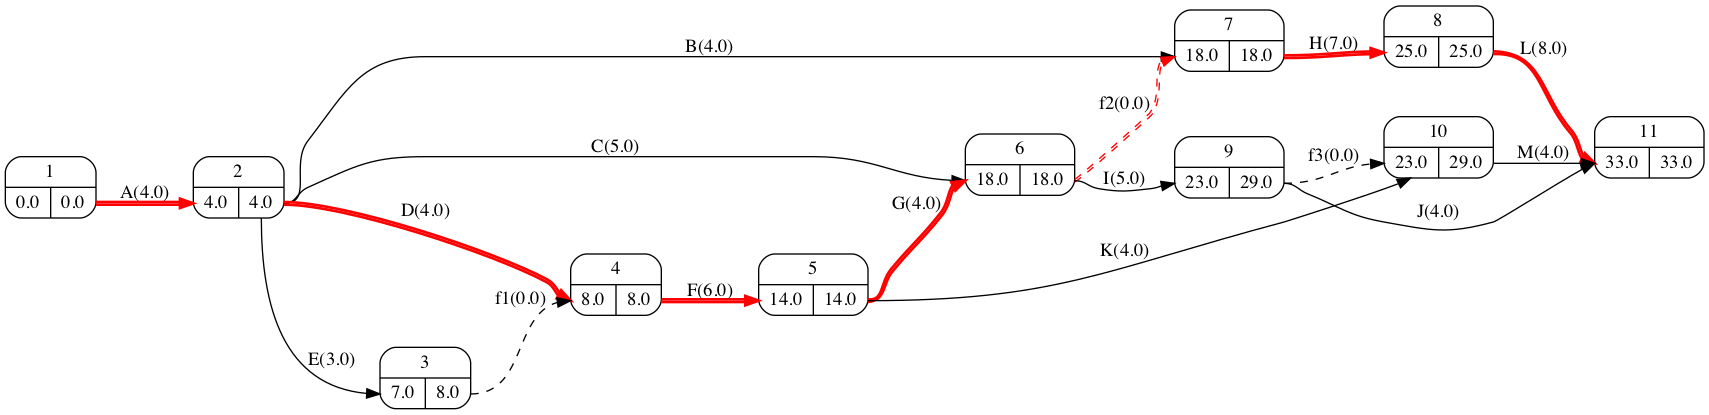

In [11]:
proyecto.pert()

### Apartado 2
> Indique sus actuaciones si existiera un límite de disponibilidad de recursos durante los primeros 7 periodos igual a 3 unidades.

#### Situación inicial
Para responder este apartado es necesario representar la demanda de recursos a lo largo del tiempo.

In [12]:
proyecto_asignacion = proyecto.copy()
gantt_recursos = proyecto_asignacion.gantt(representar = 'recursos', total='fila', holguras = True)
gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,H_total
A,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
B,,,,,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,10
C,,,,,2,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,9
D,,,,,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,0
E,,,,,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,,1
F,,,,,,,,,4,4,4,4,4,4,,,,,,,,,,,,,,,,,,,,0
G,,,,,,,,,,,,,,,1,1,1,1,,,,,,,,,,,,,,,,0
H,,,,,,,,,,,,,,,,,,,1,1,1,1,1,1,1,,,,,,,,,0
I,,,,,,,,,,,,,,,,,,,3,3,3,3,3,,,,,,,,,,,6
J,,,,,,,,,,,,,,,,,,,,,,,,4,4,4,4,,,,,,,6


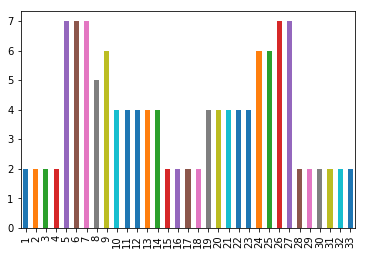

In [13]:
(gantt_recursos.data.loc['Total'].drop('H_total').plot(kind='bar'));

La demanda de recursos actual infringe el límite impuesto durante los primeros 7 periodos. Es necesario aplicar el algoritmo de asignación.

#### Algoritmo de asignación

 El primer periodo problemático es el 5.

##### Asignación periodo 5

De las actividades inicialmente programadas para el periodo 5, la tarea D es crítica y por tanto se prefiere mantener su ejecución en tal fecha. Esto implica programar 2 recursos para ese periodo. Del resto de actividades tan sólo puede programar la B por consumir 1 recurso y ya completar alcanzar el límite de 3 recursos.

In [14]:
proyecto_asignacion.desplazar(C = 1, E = 1, mostrar='recursos')


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,H_total
A,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
B,,,,,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,10
C,,,,,,2,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,8
D,,,,,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,0
E,,,,,,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,0
F,,,,,,,,,4,4,4,4,4,4,,,,,,,,,,,,,,,,,,,,0
G,,,,,,,,,,,,,,,1,1,1,1,,,,,,,,,,,,,,,,0
H,,,,,,,,,,,,,,,,,,,1,1,1,1,1,1,1,,,,,,,,,0
I,,,,,,,,,,,,,,,,,,,3,3,3,3,3,,,,,,,,,,,6
J,,,,,,,,,,,,,,,,,,,,,,,,4,4,4,4,,,,,,,6


Las actividades *slide_C* y *slide_E* representan el desplazamiento de las actividades C y E respectivamente. Nótese como la actividad E se ha vuelto crítica.

El siguiente periodo problemático es el 6.

##### Asignación periodo 6

Al encontrase en ejecución las actividades B y D se mantiene su ejecución retrasando el resto. Esto conlleva un retraso del proyecto al ser ya crítica la actividad E.

In [15]:
proyecto_asignacion.desplazar(C = 1, E = 1, mostrar='recursos')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,H_total
A,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
B,,,,,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,11
C,,,,,,,2,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,8
D,,,,,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,,1
E,,,,,,,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,0
F,,,,,,,,,,4,4,4,4,4,4,,,,,,,,,,,,,,,,,,,,0
G,,,,,,,,,,,,,,,,1,1,1,1,,,,,,,,,,,,,,,,0
H,,,,,,,,,,,,,,,,,,,,1,1,1,1,1,1,1,,,,,,,,,0
I,,,,,,,,,,,,,,,,,,,,3,3,3,3,3,,,,,,,,,,,6
J,,,,,,,,,,,,,,,,,,,,,,,,,4,4,4,4,,,,,,,6


El siguiente periodo problemático es el 7.

##### Asignación periodo 7

Al encontrase en ejecución las actividades B y D se mantiene su ejecución retrasando el resto. Esto conlleva un nuevo retraso del proyecto al ser crítica la actividad E.

In [16]:
proyecto_asignacion.desplazar(C = 1, E = 1, mostrar='recursos')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,H_total
A,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
B,,,,,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,12
C,,,,,,,,2,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,8
D,,,,,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,2
E,,,,,,,,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,0
F,,,,,,,,,,,4,4,4,4,4,4,,,,,,,,,,,,,,,,,,,,0
G,,,,,,,,,,,,,,,,,1,1,1,1,,,,,,,,,,,,,,,,0
H,,,,,,,,,,,,,,,,,,,,,1,1,1,1,1,1,1,,,,,,,,,0
I,,,,,,,,,,,,,,,,,,,,,3,3,3,3,3,,,,,,,,,,,6
J,,,,,,,,,,,,,,,,,,,,,,,,,,4,4,4,4,,,,,,,6


Con las operaciones indicadas el proyecto sería compatible con la restricción en el límite de recursos disponibles impuesta en el enunciado del ejercicio.

### Apartado 3
> Indique sus actuaciones para reducir la duración del proyecto todo lo posible con un mínimo sobrecoste añadido.


Se aborda la solución de este apartado mediante la técnica de reducción de la duración del proyecto con mínimo coste.

##### Situación inicial de partida

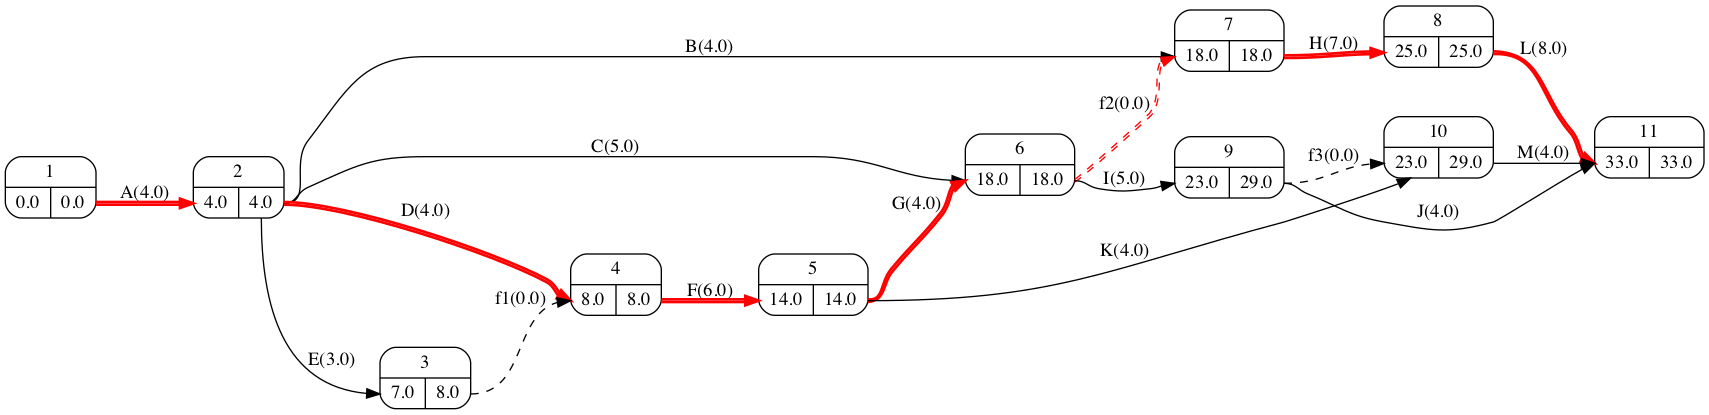

In [17]:
proyecto_reduccion = proyecto.copy()
proyecto_reduccion.pert()

##### Primera reducción de la duración del proyecto en un periodo

Analizamos los costes unitarios de reducción y la capacidad de reducción de las actividades del camino crítico. En este caso partimos de una sóla rama en el camino crítico.

In [18]:
rama_1 = ['A', 'D', 'F', 'G', 'f2', 'H', 'L']

###### Análisis rama 1

In [19]:
proyecto_reduccion.cur_ordenado(rama_1)

,cur,duracion,duracion_tope
actividad,,,
f2,0.0,0.0,0.0
D,10.0,4.0,1.0
L,10.0,8.0,5.0
H,20.0,7.0,4.0
A,25.0,4.0,1.0
G,25.0,4.0,1.0
F,30.0,6.0,3.0


En la rama 1 las actividad reducibles más baratas son la D y la L.

###### Reducción de actividades en la primera iteración.

Se propone reducir un periodo la actividades D. El coste asociado a tal reducción es:

In [20]:
proyecto_reduccion.reducir(D = 1)

Sobrecoste de la reducción: 10.0


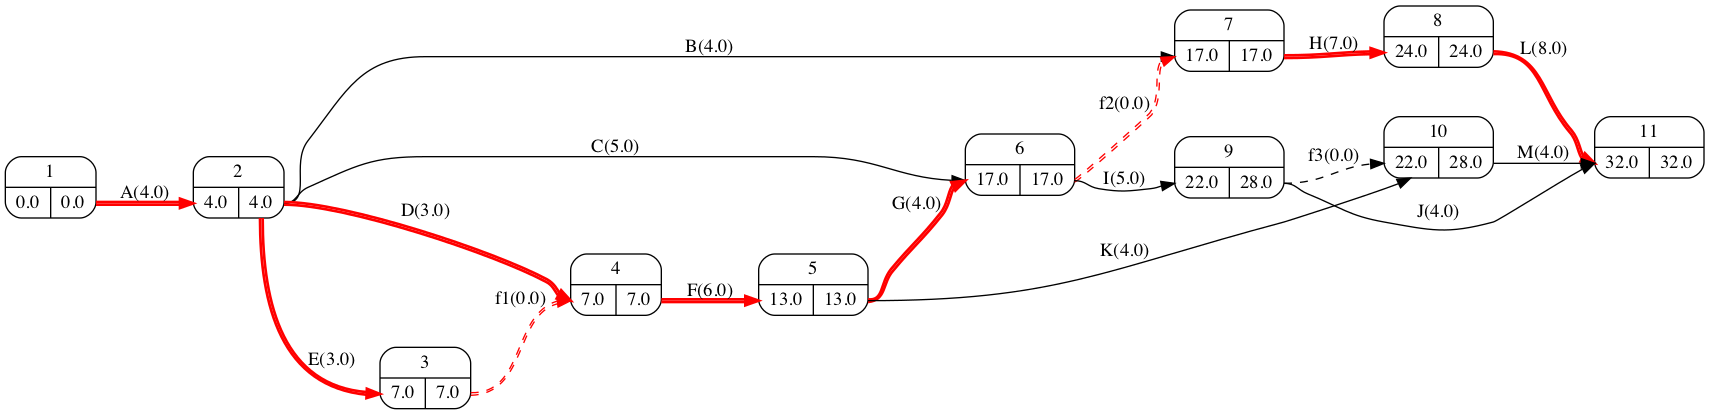

In [21]:
proyecto_reduccion.pert()

#### Segunda reducción de la duración del proyecto en un periodo

Tras la primera reducción ha surgido una nueva rama en el camino crítico, la llamaremos rama 2.

In [22]:
rama_2 = ['A', 'E', 'f1', 'F', 'G', 'f2', 'H', 'L']

###### Análisis rama 1

In [23]:
proyecto_reduccion.cur_ordenado(rama_1)

,cur,duracion,duracion_tope
actividad,,,
f2,0.0,0.0,0.0
D,10.0,3.0,1.0
L,10.0,8.0,5.0
H,20.0,7.0,4.0
A,25.0,4.0,1.0
G,25.0,4.0,1.0
F,30.0,6.0,3.0


En la rama 1 las actividades reducibles más baratas son la D y la L.

###### Análisis rama 2

In [24]:
proyecto_reduccion.cur_ordenado(rama_2)

,cur,duracion,duracion_tope
actividad,,,
f1,0.0,0.0,0.0
f2,0.0,0.0,0.0
L,10.0,8.0,5.0
H,20.0,7.0,4.0
A,25.0,4.0,1.0
G,25.0,4.0,1.0
F,30.0,6.0,3.0
E,50.0,3.0,2.0


En la rama 2 la actividad reducible más barata es la L, que además es común a la rama 1.

###### Reducción de actividades en la segunda iteración.

Se propone reducir un periodo la actividad L. El coste asociado a tal reducción es:

In [25]:
proyecto_reduccion.reducir(L = 1)

Sobrecoste de la reducción: 10.0


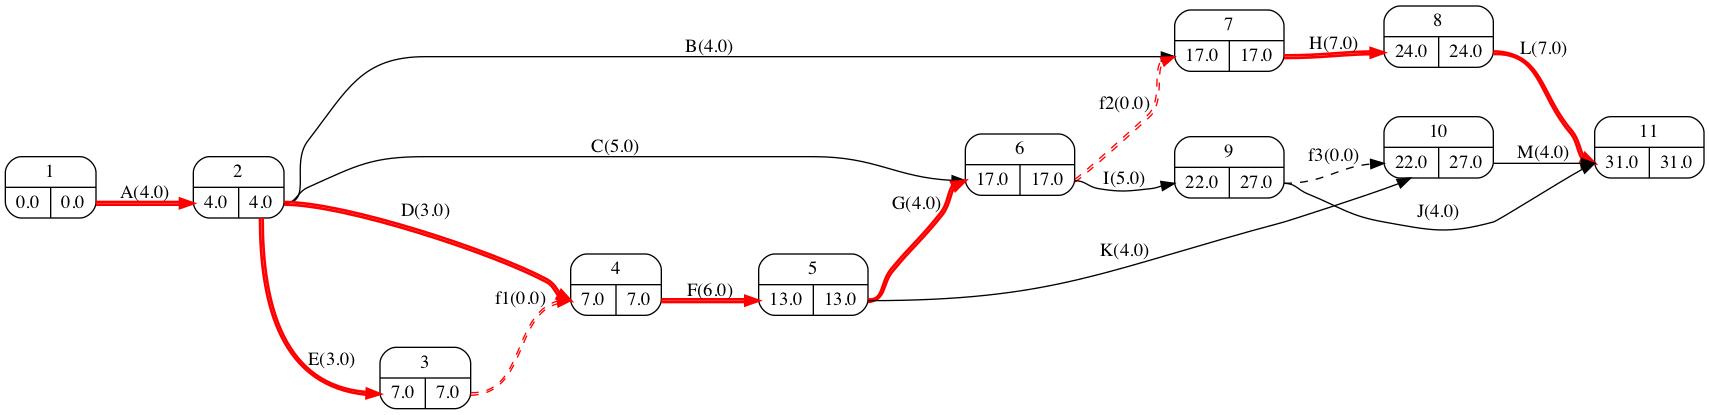

In [26]:
proyecto_reduccion.pert()

#### Tercera reducción de la duración del proyecto en un periodo

Tras la segunda reducción no ha surgido ninguna nueva rama en el camino crítico.

###### Análisis rama 1

In [27]:
proyecto_reduccion.cur_ordenado(rama_1)

,cur,duracion,duracion_tope
actividad,,,
f2,0.0,0.0,0.0
D,10.0,3.0,1.0
L,10.0,7.0,5.0
H,20.0,7.0,4.0
A,25.0,4.0,1.0
G,25.0,4.0,1.0
F,30.0,6.0,3.0


En la rama 1 las actividades reducibles más baratas son la D y la L.

###### Análisis rama 2

In [28]:
proyecto_reduccion.cur_ordenado(rama_2)

,cur,duracion,duracion_tope
actividad,,,
f1,0.0,0.0,0.0
f2,0.0,0.0,0.0
L,10.0,7.0,5.0
H,20.0,7.0,4.0
A,25.0,4.0,1.0
G,25.0,4.0,1.0
F,30.0,6.0,3.0
E,50.0,3.0,2.0


En la rama 2 la actividad reducible más barata es la L, que además es común a la rama 1.

###### Reducción de actividades en la tercera iteración.

Se propone reducir un periodo la actividad L. El coste asociado a tal reducción es:

In [29]:
proyecto_reduccion.reducir(L = 1)

Sobrecoste de la reducción: 10.0


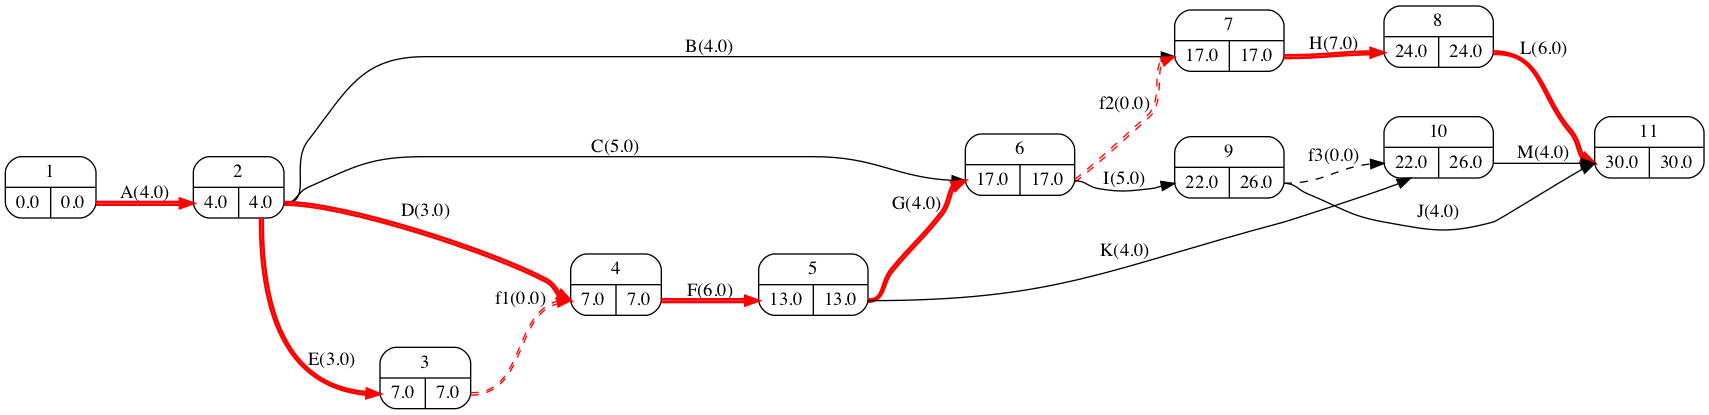

In [30]:
proyecto_reduccion.pert()

#### Cuarta reducción de la duración del proyecto en un periodo

Tras la tercera reducción no ha surgido ninguna nueva rama en el camino crítico.

###### Análisis rama 1

In [31]:
proyecto_reduccion.cur_ordenado(rama_1)

,cur,duracion,duracion_tope
actividad,,,
f2,0.0,0.0,0.0
D,10.0,3.0,1.0
L,10.0,6.0,5.0
H,20.0,7.0,4.0
A,25.0,4.0,1.0
G,25.0,4.0,1.0
F,30.0,6.0,3.0


En la rama 1 las actividades reducibles más baratas son la D y la L.

###### Análisis rama 2

In [32]:
proyecto_reduccion.cur_ordenado(rama_2)

,cur,duracion,duracion_tope
actividad,,,
f1,0.0,0.0,0.0
f2,0.0,0.0,0.0
L,10.0,6.0,5.0
H,20.0,7.0,4.0
A,25.0,4.0,1.0
G,25.0,4.0,1.0
F,30.0,6.0,3.0
E,50.0,3.0,2.0


En la rama 2 la actividad reducible más barata es la L, que además es común a la rama 1.

###### Reducción de actividades en la segunda iteración.

Se propone reducir un periodo la actividad L. El coste asociado a tal reducción es:

In [33]:
proyecto_reduccion.reducir(L = 1)

Sobrecoste de la reducción: 10.0


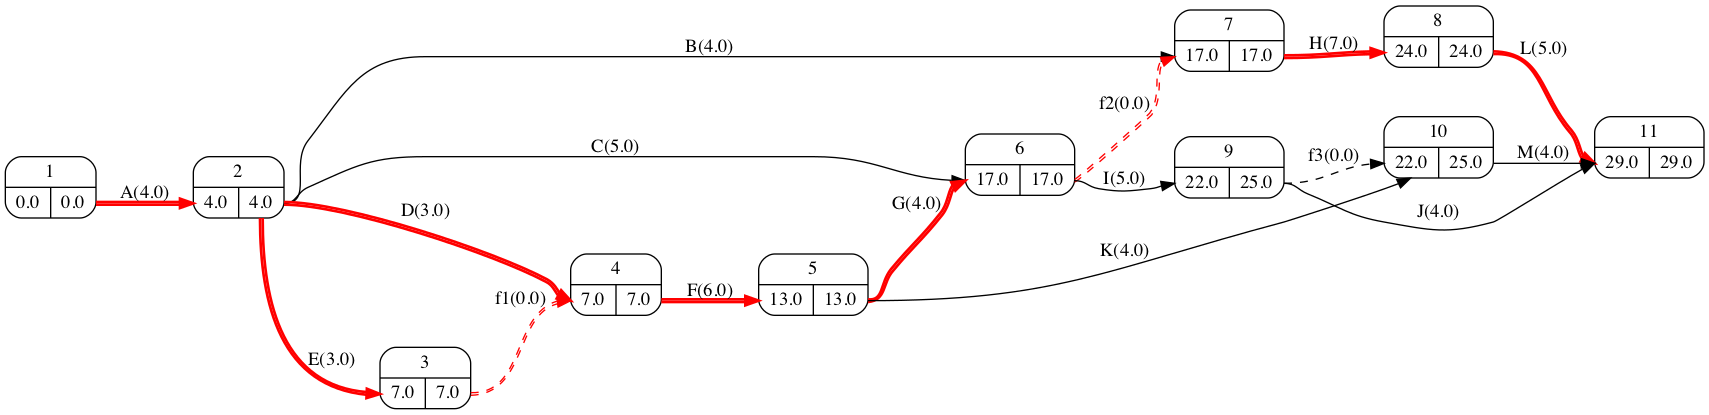

In [34]:
proyecto_reduccion.pert()

#### Quinta reducción de la duración del proyecto en un periodo

Tras la cuarta reducción no ha surgido ninguna nueva rama en el camino crítico.

###### Análisis rama 1

In [35]:
proyecto_reduccion.cur_ordenado(rama_1)

,cur,duracion,duracion_tope
actividad,,,
f2,0.0,0.0,0.0
D,10.0,3.0,1.0
L,10.0,5.0,5.0
H,20.0,7.0,4.0
A,25.0,4.0,1.0
G,25.0,4.0,1.0
F,30.0,6.0,3.0


En la rama 1 la actividades reducible más baratas es la D.

###### Análisis rama 2

In [36]:
proyecto_reduccion.cur_ordenado(rama_2)

,cur,duracion,duracion_tope
actividad,,,
f1,0.0,0.0,0.0
f2,0.0,0.0,0.0
L,10.0,5.0,5.0
H,20.0,7.0,4.0
A,25.0,4.0,1.0
G,25.0,4.0,1.0
F,30.0,6.0,3.0
E,50.0,3.0,2.0


En la rama 2 la actividad reducible más barata es la H.

###### Reducción de actividades en la segunda iteración.

Se propone reducir un periodo la actividad D y H. El coste asociado a tal reducción es:

In [37]:
proyecto_reduccion.reducir(D = 1, H = 1)

Sobrecoste de la reducción: 30.0


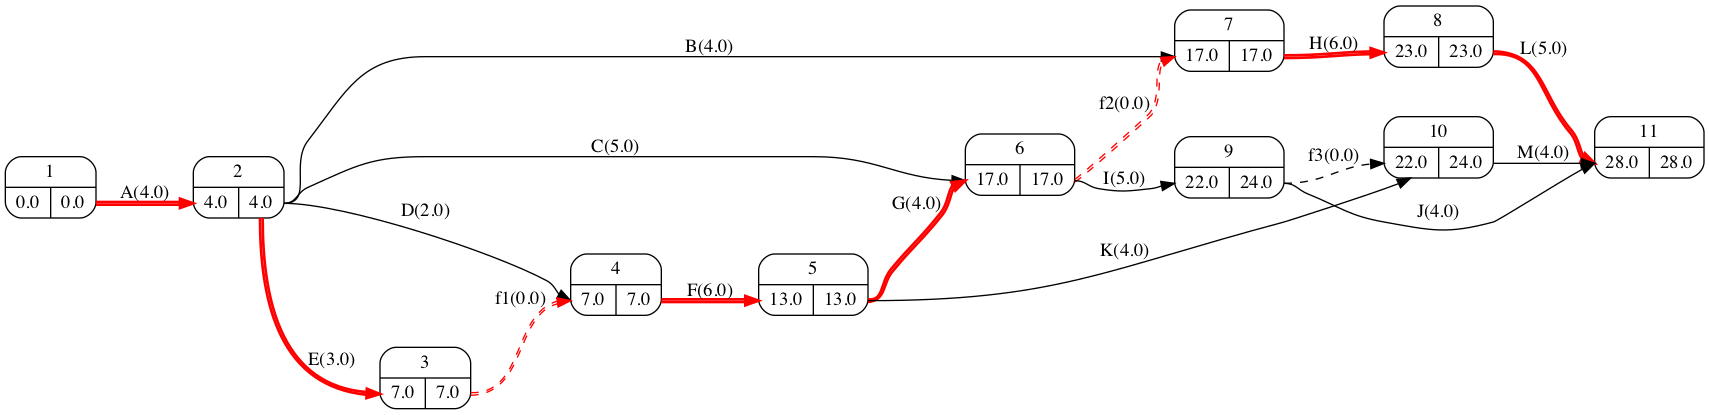

In [38]:
proyecto_reduccion.pert()

### Apartado 4
> Indique sus actuaciones para reducir la duración del proyecto hasta su duración tope con un mínimo sobrecoste añadido.

Calculamos la duración del proyecto utilizando las duraciones tope y posteriormente alargaremos la duración de las tareas no críticas que han sido recortadas ineficientemente.

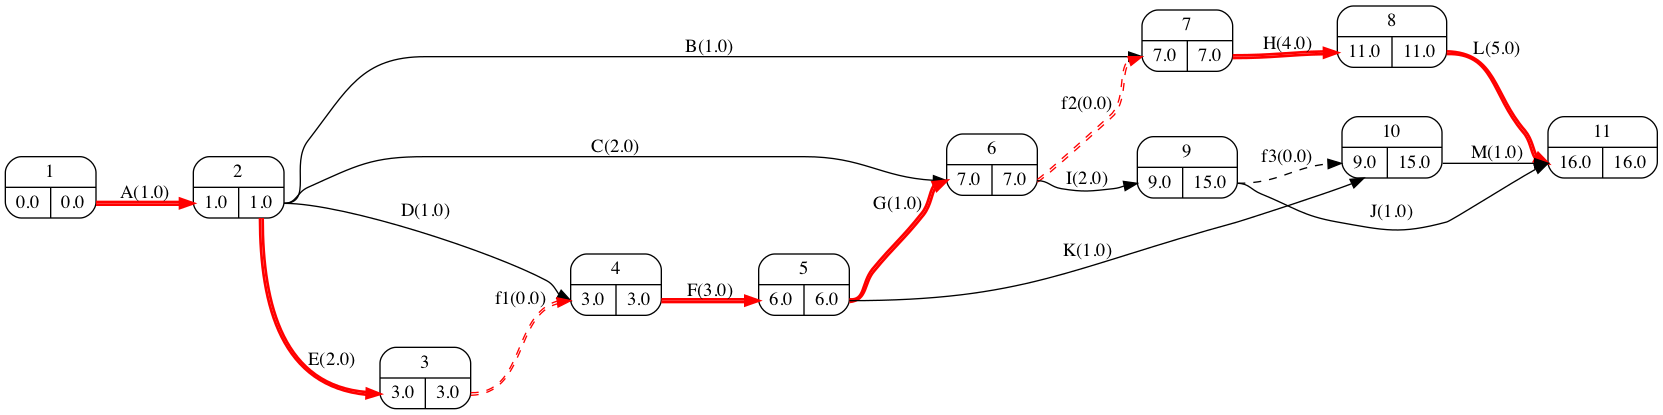

In [39]:
proyecto_tope =  proyecto.copy()
proyecto_tope.pert(duraciones=datos_proyecto['duracion_tope'])

Para conseguir esta duración tope en el proyecto, no es necesario recortar al máximo todas las actividades. Las actividades que no pertenecen al camino crítico pueden ser alargadas hasta convertirse en críticas, o llegar a su duración máxima de partida, sin aumentar la duración del proyecto y de esta manera economizando costes.

In [40]:
holguras_vs_reduccion_aplicada = pd.DataFrame({
    'H_total': proyecto_tope.calcula_pert(duraciones=datos_proyecto['duracion_tope'])['actividades']['H_total'],
    'reduccion_aplicada': datos_proyecto['duracion'] - datos_proyecto['duracion_tope']})
holguras_vs_reduccion_aplicada

,H_total,reduccion_aplicada
A,0.0,3.0
B,5.0,3.0
C,4.0,3.0
D,1.0,3.0
E,0.0,1.0
F,0.0,3.0
G,0.0,3.0
H,0.0,3.0
I,6.0,3.0
J,6.0,3.0


In [41]:
alargamientos_posibles_sin_aumentar_la_duracion_del_proyecto = holguras_vs_reduccion_aplicada.min(axis=1)
alargamientos_posibles_sin_aumentar_la_duracion_del_proyecto

A     0.0
B     3.0
C     3.0
D     1.0
E     0.0
F     0.0
G     0.0
H     0.0
I     3.0
J     3.0
K     3.0
L     0.0
M     3.0
f1    0.0
f2    0.0
f3    0.0
dtype: float64

In [42]:
duracion_minima_mas_economica = datos_proyecto['duracion_tope'] + alargamientos_posibles_sin_aumentar_la_duracion_del_proyecto
duracion_minima_mas_economica

actividad
A     1.0
B     4.0
C     5.0
D     2.0
E     2.0
F     3.0
G     1.0
H     4.0
I     5.0
J     4.0
K     4.0
L     5.0
M     4.0
f1    0.0
f2    0.0
f3    0.0
dtype: float64

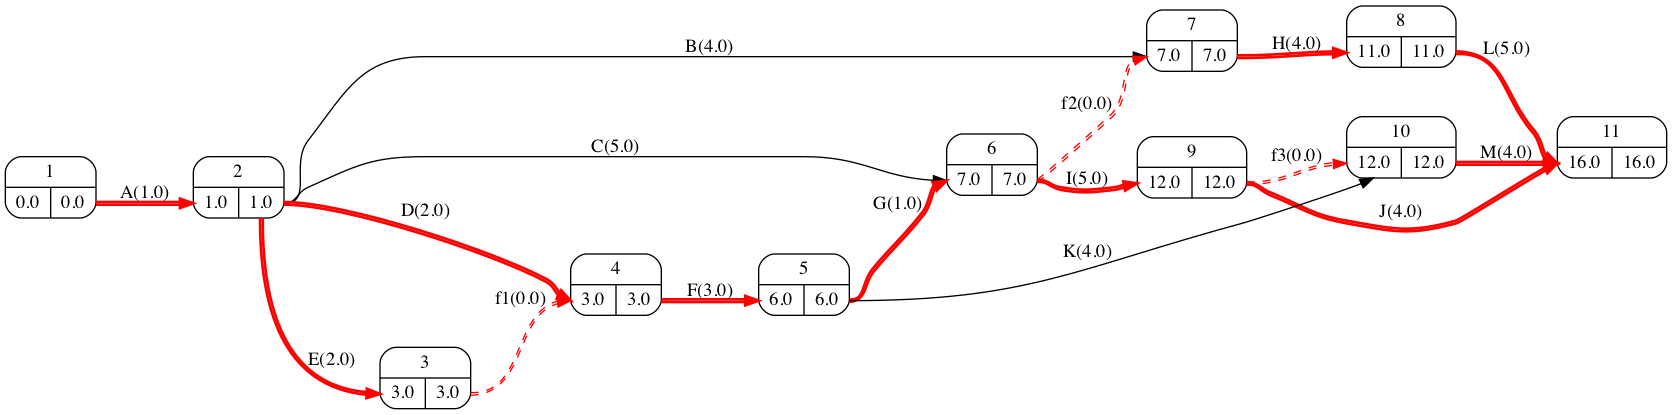

In [43]:
proyecto_tope.pert(duraciones=duracion_minima_mas_economica)

## Apartado 5

> Duración del proyecto si se introducen los siguientes cambios:
>   - Entre el final de la actividad H y el comienzo de la L deben transcurrir 2 periodos.
>   - La tarea K se inicia cuando F está a mitad de su ejecución

La solución de este apartado precisa:
   - Introducir una actividad ficticia tras el final de H y anterior a L con duración 2 periodos.
   - Partir la actividad F en dos partes F1 y F2 e iniciar K tras el final de F1.

In [44]:
aristas_modificado = pd.DataFrame([
# actividad, nodo_inicial, nodo_final
  (  'A',   1,   2  ),
  (  'B',   2,   7  ),
  (  'C',   2,   6  ),
  (  'D',   2,   4  ),
  (  'E',   2,   3  ),
  (  'F1',  4,  45  ),
  (  'F2', 45,   5  ),
  (  'G',   5,   6  ),
  (  'H',   7,   8  ),
  (  'I',   6,   9  ),
  (  'J',   9,  11  ),
  (  'K',   45,  10  ),
  (  'L',   811, 11  ),
  (  'M',  10,  11  ),
  ( 'f1',   3,   4  ),
  ( 'f2',   6,   7  ),   
  ( 'f3',   9,  10  ),  
  ( 'f4',   8,  811  ),  
] ,columns=['actividad', 'nodo_inicial', 'nodo_final']).set_index('actividad')

In [45]:
proyecto_modificado = GrafoProyecto(aristas_modificado)

##### Grafo PERT con numeración de nodos

In [46]:
duracion_modificado = datos_proyecto['duracion'].drop('F')
duracion_modificado['f4'] = 2
duracion_modificado['F1'] = 3
duracion_modificado['F2'] = 3

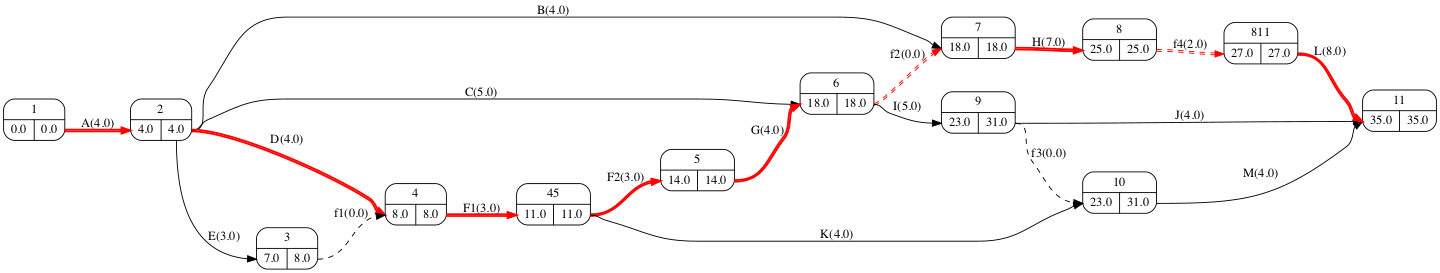

In [47]:
proyecto_modificado.pert(duraciones=duracion_modificado, size='15,5')                         